# Лабораторная 1
## Подраздел: Метод наименьших квадратов

* Cтудент: Ефимов А.В.
* Группа: М8О-307Б
* Вариант: 7

## Задание

Для таблично заданной функции путем решения нормальной
системы МНК найти приближающие многочлены a)1-ой и б)2-ой 
степени. Для каждого из приближающих многочленов вычислить
сумму квадратов ошибок. Построить графики приближаемой
функции и приближающих многочленов. 

## Решение

Загрузка и настройка библиотек:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt

np.set_printoptions(suppress=True)

Высчет многочлена:

In [2]:
def calc_poly(x, y, n):
    def calc_matrix(x, n):
        power_sums = np.array([sum(x ** i) for i in range(2 * n + 1)])
        matrix = np.zeros(((n + 1), (n + 1)))
        for i in range(n + 1):
            matrix[i, :] = power_sums[i:i+(n+1)]
            matrix[:, i] = power_sums[i:i+(n+1)]
        return matrix

    def calc_coeffs(x, y, n):
        return np.array([sum(y * x ** i) for i in range(n + 1)])

    matrix = calc_matrix(x, n)
    coeffs = calc_coeffs(x, y, n)
    return np.linalg.solve(matrix, coeffs)

Интерполяция, оценка погрешности:

In [3]:
def interpolate_point(x, poly):
    y = 0
    for a in np.flip(poly):
        y = y * x + a
    return y

def calculate_error(x, y, poly):
    interp = interpolate_point(x, poly)
    return np.sum((interp - y) ** 2)

Оценка погрешности:

In [4]:
p_count = 6
xs = np.arange(p_count)
ys = np.exp(xs)

poly_1 = calc_poly(xs, ys, 1)
poly_2 = calc_poly(xs, ys, 2)

print("Polynomial 1 error:", calculate_error(xs, ys, poly_1))
print("Polynomial 2 error:", calculate_error(xs, ys, poly_2))

Polynomial 1 error: 4621.155538740099
Polynomial 2 error: 618.4511052118866


График:

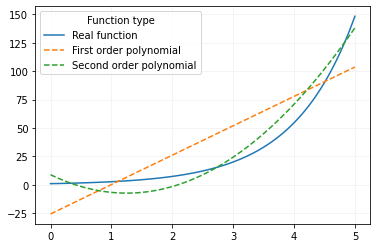

In [5]:
x = np.linspace(0, 5, 100)
plt.plot(x, np.exp(x), label="Real function")
plt.plot(x, interpolate_point(x, poly_1), '--', label="First order polynomial")
plt.plot(x, interpolate_point(x, poly_2), '--', label="Second order polynomial")

plt.legend(title="Function type")
plt.grid(color="0.95")
plt.show()